In [1]:
import requests as re
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import lxml

In [2]:
# Create an URL object
url = 'https://www.worldometers.info/coronavirus/'
# Create object page
page = re.get(url)

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID - Coronavirus Statistics - Worldometer</title>
<meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
<!-- Favicon -->
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon" siz
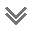

In [3]:
# parser-lxml = Change html to Python friendly format
# Obtain page's information
soup = BeautifulSoup(page.text, 'lxml')
soup

In [5]:
# Obtain information from tag <table>
table1 = soup.find('table', id='main_table_countries_today')
table1

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [232]:
# Obtain every title of columns with tag <th>
headers = []
for i in table1.find_all('th'):
    title = i.text
    headers.append(title)

In [233]:
# Convert wrapped text in column 13 into one line text
headers[13] = 'Tests/1M pop'

In [234]:
# Create a dataframe
mydata = pd.DataFrame(columns = headers)

In [235]:
mydata.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop


In [236]:
# Create a for loop to fill mydata
for j in table1.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [i.text for i in row_data]
    length = len(mydata)
    mydata.loc[length] = row

In [237]:
mydata.shape

(247, 22)

In [238]:
# Drop and clearing unnecessary rows
mydata.drop(mydata.index[0:7], inplace=True)
mydata.drop(mydata.index[222:229], inplace=True)
mydata.reset_index(inplace=True, drop=True)

# Drop “#” column
mydata.drop('#', inplace=True, axis=1)

In [239]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Country,Other        233 non-null    object
 1   TotalCases           233 non-null    object
 2   NewCases             233 non-null    object
 3   TotalDeaths          233 non-null    object
 4   NewDeaths            233 non-null    object
 5   TotalRecovered       233 non-null    object
 6   NewRecovered         233 non-null    object
 7   ActiveCases          233 non-null    object
 8   Serious,Critical     233 non-null    object
 9   Tot Cases/1M pop     233 non-null    object
 10  Deaths/1M pop        233 non-null    object
 11  TotalTests           233 non-null    object
 12  Tests/1M pop         233 non-null    object
 13  Population           233 non-null    object
 14  Continent            233 non-null    object
 15  1 Caseevery X ppl    233 non-null    object
 16  1 Deathe

In [240]:
# # Export to csv
# mydata.to_csv('covid_data.csv', index=False)

# # Try to read csv
# mydata2 = pd.read_csv('covid_data.csv')

In [241]:
arr = mydata['Country,Other'].unique()

In [242]:
len(arr)

226

In [243]:
mydata.groupby(by='Country,Other')['Deaths/1M pop'].count()

Country,Other
Afghanistan       1
Albania           1
Algeria           1
Andorra           1
Angola            1
                 ..
Western Sahara    1
World             1
Yemen             1
Zambia            1
Zimbabwe          1
Name: Deaths/1M pop, Length: 226, dtype: int64

In [244]:
mydata['Deaths/1M pop']

0      890.9
1      3,535
2        379
3      2,556
4      2,124
       ...  
228         
229         
230         
231         
232    890.9
Name: Deaths/1M pop, Length: 233, dtype: object

In [245]:
mydata.columns

Index(['Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop',
       'Population', 'Continent', '1 Caseevery X ppl', '1 Deathevery X ppl',
       '1 Testevery X ppl', 'New Cases/1M pop', 'New Deaths/1M pop',
       'Active Cases/1M pop'],
      dtype='object')

In [246]:
data = mydata.drop(['NewCases','NewDeaths','NewRecovered','NewRecovered','ActiveCases','Serious,Critical','1 Caseevery X ppl','1 Deathevery X ppl','1 Testevery X ppl','New Cases/1M pop','New Deaths/1M pop','Active Cases/1M pop'],axis =1)

In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country,Other     233 non-null    object
 1   TotalCases        233 non-null    object
 2   TotalDeaths       233 non-null    object
 3   TotalRecovered    233 non-null    object
 4   Tot Cases/1M pop  233 non-null    object
 5   Deaths/1M pop     233 non-null    object
 6   TotalTests        233 non-null    object
 7   Tests/1M pop      233 non-null    object
 8   Population        233 non-null    object
 9   Continent         233 non-null    object
dtypes: object(10)
memory usage: 18.3+ KB


In [248]:
data = data.rename(columns = {'Country,Other':'country',
                       'Tot Cases/1M pop':'tot_cases_1M_pop',
                       'Deaths/1M pop':'deaths_1M pop',
                       'TotalCases':'total_cases',
                       'TotalDeaths':'total_deaths',
                       'TotalRecovered':'total_recovered',
                       'TotalTests':'total_tests',
                       'Tests/1M pop':'tests_1M_pop',
                       'Population':'population',
                       'Continent':'continent'})

In [250]:
data.tail(10)

,country,total_cases,total_deaths,total_recovered,Tot Cases/1M pop,deaths_1M pop,total_tests,tests_1M_pop,population,continent
223,MS Zaandam,9,2,7,,,,,,
224,China,"503,302","5,272","379,053",347,4,"160,000,000","110,461","1,448,471,400",Asia
225,Total:,"129,367,923","1,655,496","125,092,026",,,,,,North America
226,Total:,"220,891,565","1,551,864","204,541,790",,,,,,Asia
227,Total:,"251,408,679","2,083,959","247,036,867",,,,,,Europe
228,Total:,"69,304,718","1,363,029","66,575,735",,,,,,South America
229,Total:,"14,627,153","30,976","14,482,287",,,,,,Australia/Oceania
230,Total:,"12,845,417","258,851","12,089,354",,,,,,Africa
231,Total:,721,15,706,,,,,,
232,Total:,"698,446,176","6,944,190","669,818,765","89,604.1",890.9,,,,All


In [251]:
data = data.drop(index = [0,225,226,227,228,229,230,231,232],axis=0)

In [256]:
data

,country,total_cases,total_deaths,total_recovered,Tot Cases/1M pop,deaths_1M pop,total_tests,tests_1M_pop,population,continent
1,USA,"109,522,503","1,183,470","107,428,691","327,123","3,535","1,186,431,916","3,543,648","334,805,269",North America
2,India,"45,001,807","533,298",N/A,"31,993",379,"930,797,975","661,721","1,406,631,776",Asia
3,France,"40,138,560","167,642","39,970,918","612,013","2,556","271,490,188","4,139,547","65,584,518",Europe
4,Germany,"38,641,986","178,162","38,240,600","460,662","2,124","122,332,384","1,458,359","83,883,596",Europe
5,Brazil,"38,048,773","707,470","36,249,161","176,680","3,285","63,776,166","296,146","215,353,593",South America
...,...,...,...,...,...,...,...,...,...,...
220,Saint Pierre Miquelon,"3,452",2,"2,449","599,410",347,"25,400","4,410,488","5,759",North America
221,Tuvalu,"2,943",1,N/A,"243,909",83,,,"12,066",Australia/Oceania
222,Western Sahara,10,1,9,16,2,,,"626,161",Africa
223,MS Zaandam,9,2,7,,,,,,


In [258]:
data = data.apply(lambda x: x.str.replace(',','.'))

In [262]:
data

,country,total_cases,total_deaths,total_recovered,Tot Cases/1M pop,deaths_1M pop,total_tests,tests_1M_pop,population,continent
1,USA,109.522.503,1.183.470,107.428.691,327.123,3.535,1.186.431.916,3.543.648,334.805.269,North America
2,India,45.001.807,533.298,N/A,31.993,379,930.797.975,661.721,1.406.631.776,Asia
3,France,40.138.560,167.642,39.970.918,612.013,2.556,271.490.188,4.139.547,65.584.518,Europe
4,Germany,38.641.986,178.162,38.240.600,460.662,2.124,122.332.384,1.458.359,83.883.596,Europe
5,Brazil,38.048.773,707.470,36.249.161,176.680,3.285,63.776.166,296.146,215.353.593,South America
...,...,...,...,...,...,...,...,...,...,...
220,Saint Pierre Miquelon,3.452,2,2.449,599.410,347,25.400,4.410.488,5.759,North America
221,Tuvalu,2.943,1,N/A,243.909,83,,,12.066,Australia/Oceania
222,Western Sahara,10,1,9,16,2,,,626.161,Africa
223,MS Zaandam,9,2,7,,,,,,


In [277]:
float( '%.1f'%(109.522.503))

SyntaxError: invalid syntax. Perhaps you forgot a comma? (313837045.py, line 1)

In [264]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224 entries, 1 to 224
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country           224 non-null    object
 1   total_cases       224 non-null    object
 2   total_deaths      224 non-null    object
 3   total_recovered   224 non-null    object
 4   Tot Cases/1M pop  224 non-null    object
 5   deaths_1M pop     224 non-null    object
 6   total_tests       224 non-null    object
 7   tests_1M_pop      224 non-null    object
 8   population        224 non-null    object
 9   continent         224 non-null    object
dtypes: object(10)
memory usage: 19.2+ KB
